In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('BlackFriday.csv')

In [3]:
data.shape

(537577, 12)

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
data.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

# City_Category Count

In [77]:
(data.groupby(by='City_Category')['User_ID'].count()).to_frame().rename(columns={"User_ID":"Count"})

,Count
City_Category,
A,144638
B,226493
C,166446


# Data Definition

Dataset have 12 variables and 537577 observations.

Description of 12 variables:
-------------------------------------------

User_id 
-----------------

Users took a part in the black friday sale event. There are 5891 unique users participated in the sale.

Product_id
--------------------

Products sold in the event. There are 3623 unique products sold in the black friday event.

Gender 
------------------

Male(405380) and female (132197) are took in part in the sale event. 


Age
-------

Age 7 of groups participated in the sale event 
(i.e  

0-17 ----Teenagers

18-25----Youth

26-35----Middle-Aged people

36-45 ---- Family

46-50 ---- 

51-55----Citizens

55+-----Senior Citizens


Occupation
------------------

There are 21 categories of occupation participated in the event. Occupation starts from range 0 to till 21. Problem in Occupation variable to define Occupation type.


City_Category
-----------------------------

Black friday sale held in 3 type of city category .

'A'--- Rural

'B'---- Metropolitian

'C'---Urban


Stay_In_Current_City_Years
-------------------------------------------
Totally 5 type of people under Staying current city years participated in the sale event.

0 ----- New to Area 

1 -----

2 -----
 
3 -----

4+ ----- Residents



Martial_Status
---------------------------

Two type of categories 

Married   ----- 0  (317817)
UnMarried ----- 1 (219760)


Product_Category_1 
---------------------
18 unique products are available in product category 1.

Product_Category_2 
----------------------------------
17 unique products are available in product category 2.

Product_Category_3
------------------------------------
15 unique products are available in product category 3.

Purchase (Dollars)
--------------------

Purchase done by the 5891 userid in the black friday sale.














In [9]:
data['Product_ID']=data['Product_ID'].astype('object')
data['Product_Category_1']=data['Product_Category_1'].astype('category')
data['Product_Category_2']=data['Product_Category_2'].astype('category')
data['Product_Category_3']=data['Product_Category_3'].astype('category')
data['Gender']=data['Gender'].astype('category')
data['Age']=data['Age'].astype('category')
data['Occupation']=data['Occupation'].astype('category')
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype('category')
data['Marital_Status']=data['Marital_Status'].astype('category')
data['City_Category']=data['City_Category'].astype('category')

In [10]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

# Gender Count

In [14]:
(data.groupby(by=['Gender'])['User_ID'].count().to_frame()).rename(columns={"User_ID":"Count"})

,Count
Gender,
F,132197
M,405380


1)Out of 537577 records , Male count is 405380 and female count is 132197.

2)Males are more particapting in the black friday sale compoared to females.


# Martial Status

In [15]:
(data.groupby(by=['Marital_Status'])['User_ID'].count().to_frame()).rename(columns={"User_ID":'Count'})

,Count
Marital_Status,
0,317817
1,219760


Married people (317817) are more interested in sale compared to un-married people(219760).

# Distribution Of Purchase

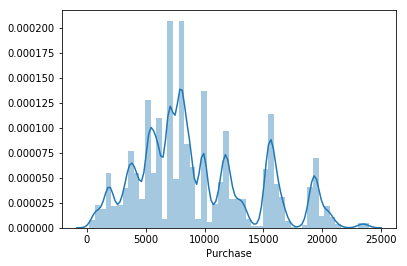

In [19]:
sns.distplot(data['Purchase'],kde=True)
plt.show()

# Age Vs Pruchase

In [16]:
data.groupby(by=['Age']).sum()['Purchase'].to_frame().sort_values(by=['Purchase'],ascending=0)

,Purchase
Age,
26-35,1999749106
36-45,1010649565
18-25,901669280
46-50,413418223
51-55,361908356
55+,197614842
0-17,132659006


More purchases bill  are at around  6000-9000 rupees.


# Loyalty Customers by Purchase wise

In [55]:
(data.groupby(by=['User_ID']).sum())['Purchase'].to_frame().sort_values(by=['Purchase'],ascending=0).head()

,Purchase
User_ID,
1004277,10536783
1001680,8699232
1002909,7577505
1001941,6817493
1000424,6573609


# Loyalty Customers by frequency wise

In [19]:
(data.groupby(by=['User_ID']).count())['Purchase'].to_frame().sort_values(by=['Purchase'],ascending=0).rename(columns={"Purchase":'Count'}).head(15)

,Count
User_ID,
1001680,1025
1004277,978
1001941,898
1001181,861
1000889,822
1003618,766
1001150,752
1001015,739
1002909,717


# Category Of Interest

In [106]:
COI=((pd.pivot_table(data,index=data[['City_Category','Gender']],columns=data['Age'],aggfunc='sum')['Purchase']).stack()).to_frame()

In [107]:
COI.rename(columns={0:"Purchase"},inplace=True)
COI.sort_values(by='Purchase',ascending=False).head(8)

Purchase
City_Category Gender Age             
B             M      26-35  645686249
A             M      26-35  499205289
C             M      26-35  420999888
B             M      36-45  331103247
                     18-25  292767819
C             M      36-45  265313129
                     18-25  216737702
A             M      18-25  189954309

# Top 100 products by UniqueCountOfCustomers

In [112]:
Count = pd.pivot_table(data,index=['Product_ID'],aggfunc=pd.Series.nunique)

In [113]:
product1 = Count.sort_values(by = 'User_ID',ascending=False )[['User_ID']]
product1.rename(columns={"User_ID":"UniqueCountOfCustomers"})
product1.head(100)

,User_ID
Product_ID,
P00265242,1858
P00110742,1591
P00025442,1586
P00112142,1539
P00057642,1430
P00184942,1424
P00046742,1417
P00058042,1396
P00145042,1384


# Top 100 products by purchase value

In [122]:
purchase = pd.pivot_table(data,index=['Product_ID'],aggfunc='sum')
df1 = purchase.sort_values(by = 'Purchase',ascending=False )['Purchase']
df1.to_frame().head(100)

,Purchase
Product_ID,
P00025442,27532426
P00110742,26382569
P00255842,24652442
P00184942,24060871
P00059442,23948299
P00112142,23882624
P00110942,23232538
P00237542,23096487
P00057642,22493690


# PivotTable for Gender,Martial_Status

In [92]:
df=((pd.pivot_table(data,index=data[['Gender','Marital_Status']],columns=data['Age'],aggfunc='sum')['Purchase']).stack()).to_frame()
df.rename(columns={0:"Purchase"},inplace=True)
df.sort_values(by='Purchase')

import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = df.style.background_gradient(cmap=cm)
s